
# Introduction to Python 🐍
**Pre-work notebook** for the course:  
**"Green Algorithms for Artificial Intelligence: Design and Implementation"**

> Goal: become comfortable reading, writing, and running basic Python with good efficiency practices (time, memory, and energy) before the course begins.



## What you'll find in this notebook
1. Environment setup
2. Running cells and getting help
3. Essential syntax: variables, types, and operations
4. Control structures
5. Functions and modules
6. Data structures (lists, tuples, dictionaries, sets)
7. File I/O with *pathlib*
8. NumPy and vectorization: foundations for efficient compute
9. Pandas: data manipulation
10. Quick visualization with Matplotlib
11. Performance & efficiency: **CodeCarbon** energy/emissions tracking
11.5. Template: **Hugging Face Transformers** + **CodeCarbon** (quick fine-tuning on SST-2)
12. Practice exercises with solutions (at the end)


## 1) Environment setup
## How to open and run this notebook in **Google Colab**
1. Go to Google Colab.
2. **File → Upload notebook** and select this `.ipynb` file.
3. (Optional) **Runtime → Change runtime type** and choose **GPU** or **TPU** if needed.
4. Install dependencies in a cell, for example:
   ```python
   !pip -q install numpy pandas matplotlib codecarbon
   ```
5. Run the cells in order (**Runtime → Run all**) and inspect time & energy metrics via **CodeCarbon**.
6. To save changes in Drive: **File → Save a copy in Drive**.

> Tip: when measuring energy with CodeCarbon in Colab, avoid heavy tasks in other tabs to reduce measurement noise.



## 2) Running cells and asking for help
- Run a cell with **Shift+Enter**.
- Use `help(obj)` or `obj?` for quick docs.


In [1]:
# Run this
x = 42
print("Hello, Python. x =", x)

Hello, Python. x = 42


In [2]:
# Quick help
help(len)  # or use len? in an interactive cell

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.




## 3) Essential syntax: variables, types, and operations
Python is **dynamic** and **strongly typed**. Common types:
- `int`, `float`, `bool`, `str`, `None`
- Arithmetic operators: `+ - * / // % **`
- Comparison operators: `== != < <= > >=`
- Logical operators: `and or not`


In [3]:
a = 10
b = 3
print("sum:", a + b)
print("power:", a ** b)
print("true division:", a / b)
print("integer division:", a // b)
print("modulo:", a % b)
print("a>b?:", a > b)

text = "Sustainable AI"
print(text.upper(), len(text))

sum: 13
power: 1000
true division: 3.3333333333333335
integer division: 3
modulo: 1
a>b?: True
SUSTAINABLE AI 14



## 4) Control structures
### Conditionals and loops


In [4]:
n = 7

if n % 2 == 0:
    print("even")
else:
    print("odd")

# Loops
for i in range(5):
    print("i:", i)

# while with condition
s = 0
k = 1
while k <= 5:
    s += k
    k += 1
s

odd
i: 0
i: 1
i: 2
i: 3
i: 4


15


## 5) Functions and modules
- Define functions with `def`.
- Document with *docstrings*.
- Import modules with `import`.


In [5]:
def is_prime(n: int) -> bool:
    """Return True if n is prime, False otherwise."""
    if n < 2:
        return False
    if n % 2 == 0:
        return n == 2
    i = 3
    while i * i <= n:
        if n % i == 0:
            return False
        i += 2
    return True

[ (k, is_prime(k)) for k in range(1, 20) ]

[(1, False),
 (2, True),
 (3, True),
 (4, False),
 (5, True),
 (6, False),
 (7, True),
 (8, False),
 (9, False),
 (10, False),
 (11, True),
 (12, False),
 (13, True),
 (14, False),
 (15, False),
 (16, False),
 (17, True),
 (18, False),
 (19, True)]

In [6]:
import math
math.sqrt(144), math.pi

(12.0, 3.141592653589793)


## 6) Data structures


In [7]:
# Lists (mutable)
nums = [3, 1, 4, 1, 5, 9]
nums.append(2)
nums.sort()
nums

[1, 1, 2, 3, 4, 5, 9]

In [8]:
# Tuples (immutable)
point = (10, 20)
point

(10, 20)

In [9]:
# Dictionaries (key->value)
energy = {"CPU": 65.0, "GPU": 150.0, "TPU": 120.0}
energy["GPU"]

150.0

In [10]:
# Sets (no duplicates)
unique = set([1, 2, 2, 3, 3, 3])
unique

{1, 2, 3}


## 7) File I/O and *pathlib*


In [11]:
from pathlib import Path

p = Path("demo.txt")
p.write_text("Hello file!\nThis is an example.")
print("Content:\n", p.read_text())

# Clean up
p.unlink()

Content:
 Hello file!
This is an example.



## 8) NumPy and vectorization: foundations for efficient compute
- `numpy` offers **efficient arrays** and vectorized operations (avoid Python loops).
- Key for performance and energy: **less interpreter, more bulk operations**.


In [12]:
import numpy as np

a = np.arange(100000, dtype=np.float64)
b = np.arange(100000, 0, -1, dtype=np.float64)

# Vectorized operation
c = a * b + np.sin(a)
c[:5], c.shape, c.dtype

(array([     0.        ,  99999.84147098, 199996.90929743, 299991.14112001,
        399983.2431975 ]),
 (100000,),
 dtype('float64'))

In [13]:
# Quick comparison (rough, not exact timing)
import time

def python_loop(a_list, b_list):
    out = []
    append = out.append
    import math
    for x, y in zip(a_list, b_list):
        append(x*y + math.sin(x))
    return out

a_list = list(range(5000000))
b_list = list(range(5000000, 0, -1))

t0 = time.perf_counter()
out_list = python_loop(a_list, b_list)
t1 = time.perf_counter()

t2 = time.perf_counter()
out_np = np.array(a_list) * np.array(b_list) + np.sin(np.array(a_list))
t3 = time.perf_counter()

t4 = time.perf_counter()
out_np = a * b + np.sin(a)
t5 = time.perf_counter()

print("Python loop time:", round(t1 - t0, 4), "s")
print("NumPy time (with creation):", round(t3 - t2, 4), "s")
print("NumPy time (arrays already created):", round(t5 - t4, 4), "s")

Python loop time: 1.516 s
NumPy time (with creation): 1.2182 s
NumPy time (arrays already created): 0.0075 s



## 9) Pandas: data manipulation


In [14]:
import pandas as pd

df = pd.DataFrame({
    "algorithm": ["A", "B", "C", "A", "B", "C"],
    "accuracy": [0.81, 0.85, 0.83, 0.82, 0.84, 0.86],
    "energy_wh": [5.1, 7.3, 6.0, 5.0, 7.1, 6.2],
    "time_s": [1.2, 2.1, 1.5, 1.1, 2.0, 1.6]
})
df.head()

,algorithm,accuracy,energy_wh,time_s
0,A,0.81,5.1,1.2
1,B,0.85,7.3,2.1
2,C,0.83,6.0,1.5
3,A,0.82,5.0,1.1
4,B,0.84,7.1,2.0


In [15]:
# Aggregations
summary = df.groupby("algorithm").agg(accuracy_mean=("accuracy", "mean"),
                                      energy_mean=("energy_wh", "mean"),
                                      time_mean=("time_s", "mean"))
summary

,accuracy_mean,energy_mean,time_mean
algorithm,,,
A,0.815,5.05,1.15
B,0.845,7.20,2.05
C,0.845,6.10,1.55



## 10) Quick visualization with Matplotlib
> Tip: avoid hard-coding styles/colors when you just need a quick look.


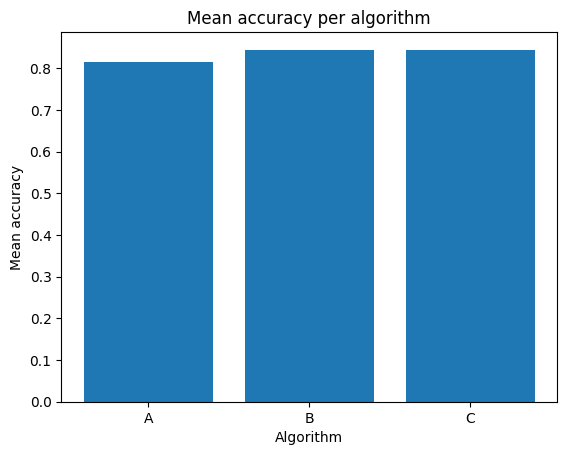

In [16]:
import matplotlib.pyplot as plt

summary_sorted = summary.sort_values("accuracy_mean")
plt.figure()
plt.bar(summary_sorted.index, summary_sorted["accuracy_mean"])
plt.title("Mean accuracy per algorithm")
plt.xlabel("Algorithm")
plt.ylabel("Mean accuracy")
plt.show()


## 11) Performance and efficiency: time, memory, and **energy** with CodeCarbon
We'll measure **execution time**, **estimated energy consumption**, and **CO₂e emissions** using **[CodeCarbon](https://mlco2.github.io/codecarbon/)**.

**Key ideas:**
- **Measure before you optimize**: avoid blind changes.
- **Vectorize** when possible (less interpreter → less CPU → less energy).
- **Reduce copies** and pick proper dtypes (`float32` vs `float64`).
- **Be mindful of parallelism**: more threads/GPUs do not always mean less total energy for a given SLA.



### 11.1) Setup: install CodeCarbon (Colab or local)
Run the cell below if you don't have `codecarbon` installed. In **Google Colab** it is typically enough.


In [17]:
# Install CodeCarbon if needed (ignore if already installed).
# In some environments you may need to restart the kernel after installation.
try:
    import codecarbon  # noqa: F401
except ImportError:
    !pip install codecarbon

/home/daniel/.virtualenvs/udc/lib/python3.13/site-packages/codecarbon/core/gpu.py:4: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml



### 11.2) Measuring a simple experiment (pure Python vs NumPy)
We compare two approaches for the same task: a **Python loop** and a **vectorized NumPy** version.  
**CodeCarbon** will estimate energy and emissions. For portability, we use **offline** mode and set the country to **Spain (ESP)**.


**What this cell does**

Define two equivalent functions (Python loop vs NumPy) and measure **time**, **energy**, and **emissions** with CodeCarbon (offline, ESP).

In [18]:
from time import perf_counter
import numpy as np

from codecarbon import EmissionsTracker

def experiment_python(N=200_000):
    import matha
    out = []
    append = out.append
    for i in range(N):
        append(i * (N - i) + math.sin(i))
    return sum(out)

def experiment_numpy(N=200_000):
    a = np.arange(N, dtype=np.float64)
    b = np.arange(N, 0, -1, dtype=np.float64)
    c = a * b + np.sin(a)
    return float(np.sum(c))

def measure(func, *args, **kwargs):
    tracker = EmissionsTracker()
    tracker.start()
    t0 = perf_counter()
    res = func(*args, **kwargs)
    t1 = perf_counter()
    emissions = tracker.stop()
    print(f"\nCarbon emissions from computation: {tracker.final_emissions * 1000:.4f} g CO2eq")
    print("\nDetailed emissions data:", tracker.final_emissions_data)
    energy_kwh = tracker.final_emissions_data.energy_consumed  # estimated energy
    return {
        "result": res,
        "time_s": t1 - t0,
        "energy_kwh": energy_kwh,
        "emissions_kgco2": emissions,
        "method": func.__name__,
    }

m_py = measure(experiment_python, 1500000)
m_np = measure(experiment_numpy, 1500000)
m_py, m_np

[codecarbon WARNING @ 23:36:35] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 23:36:35] [setup] RAM Tracking...
[codecarbon INFO @ 23:36:35] [setup] CPU Tracking...
[codecarbon WARNING @ 23:36:35] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 23:36:35] CPU Model on constant consumption mode: Intel(R) Core(TM) i7-10510U CPU @ 1.80GHz
[codecarbon WARNING @ 23:36:35] No CPU tracking mode found. Falling back on CPU load mode.
[codecarbon INFO @ 23:36:35] [setup] GPU Tracking...
[codecarbon INFO @ 23:36:35] No GPU found.
[codecarbon INFO @ 23:36:35] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: cpu_load
                GPU Tracking Method: Unspecified
            
[codecarbon INFO @ 23:36:35


Carbon emissions from computation: 0.0006 g CO2eq

Detailed emissions data: EmissionsData(timestamp='2025-09-07T23:36:40', project_name='codecarbon', run_id='bdd5f0fa-1557-4b50-ab4b-1a60360b1ca6', experiment_id='5b0fa12a-3dd7-45bb-9766-cc326314d9f1', duration=1.6482632959996408, emissions=6.378816614910352e-07, emissions_rate=3.8700228479223154e-07, cpu_power=1.5628757505000006, gpu_power=0.0, ram_power=10.0, cpu_energy=4.957737129520839e-07, gpu_energy=0.0, ram_energy=3.1691597055542945e-06, energy_consumed=3.6649334185063785e-06, country_name='Spain', country_iso_code='ESP', region='galicia', cloud_provider='', cloud_region='', os='Linux-6.16.3-200.fc42.x86_64-x86_64-with-glibc2.41', python_version='3.13.7', codecarbon_version='3.0.4', cpu_count=8, cpu_model='Intel(R) Core(TM) i7-10510U CPU @ 1.80GHz', gpu_count=None, gpu_model=None, longitude=-8.4012, latitude=43.3626, ram_total_size=15.275806427001953, tracking_mode='machine', on_cloud='N', pue=1.0)


[codecarbon WARNING @ 23:36:40] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 23:36:40] CPU Model on constant consumption mode: Intel(R) Core(TM) i7-10510U CPU @ 1.80GHz
[codecarbon WARNING @ 23:36:40] No CPU tracking mode found. Falling back on CPU load mode.
[codecarbon INFO @ 23:36:40] [setup] GPU Tracking...
[codecarbon INFO @ 23:36:40] No GPU found.
[codecarbon INFO @ 23:36:40] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: cpu_load
                GPU Tracking Method: Unspecified
            
[codecarbon INFO @ 23:36:40] >>> Tracker's metadata:
[codecarbon INFO @ 23:36:40]   Platform system: Linux-6.16.3-200.fc42.x86_64-x86_64-with-glibc2.41
[codecarbon INFO @ 23:36:40]   Python version: 3.13.7
[codecarbon INFO @ 23:36:40] 


Carbon emissions from computation: 0.0004 g CO2eq

Detailed emissions data: EmissionsData(timestamp='2025-09-07T23:36:45', project_name='codecarbon', run_id='9d45cf40-67cb-439b-99b2-6514d75264a3', experiment_id='5b0fa12a-3dd7-45bb-9766-cc326314d9f1', duration=1.17327335400023, emissions=3.698951888305141e-07, emissions_rate=3.152676974801915e-07, cpu_power=1.5289803015, gpu_power=0.0, ram_power=10.0, cpu_energy=2.824198665381447e-07, gpu_energy=0.0, ram_energy=1.8428038555561621e-06, energy_consumed=2.125223722094307e-06, country_name='Spain', country_iso_code='ESP', region='galicia', cloud_provider='', cloud_region='', os='Linux-6.16.3-200.fc42.x86_64-x86_64-with-glibc2.41', python_version='3.13.7', codecarbon_version='3.0.4', cpu_count=8, cpu_model='Intel(R) Core(TM) i7-10510U CPU @ 1.80GHz', gpu_count=None, gpu_model=None, longitude=-8.4012, latitude=43.3626, ram_total_size=15.275806427001953, tracking_mode='machine', on_cloud='N', pue=1.0)


({'result': 5.6249999999975e+17,
  'time_s': 0.6372085539996988,
  'energy_kwh': 3.6649334185063785e-06,
  'emissions_kgco2': 6.378816614910352e-07,
  'method': 'experiment_python'},
 {'result': 5.6249999999975e+17,
  'time_s': 0.1605161469997256,
  'energy_kwh': 2.125223722094307e-06,
  'emissions_kgco2': 3.698951888305141e-07,
  'method': 'experiment_numpy'})

In [19]:
import pandas as pd
from math import isfinite

df_cc = pd.DataFrame([m_py, m_np])
cols = ["method", "time_s", "energy_kwh", "emissions_kgco2"]
for c in cols[1:]:
    df_cc[c] = df_cc[c].apply(lambda x: round(x, 6) if (isinstance(x, (int, float)) and isfinite(x)) else x)
df_cc[cols]

,method,time_s,energy_kwh,emissions_kgco2
0,experiment_python,0.637209,0.000004,0.000001
1,experiment_numpy,0.160516,0.000002,0.000000



**Quick read:** on typical machines, the **vectorized NumPy** approach tends to be faster and consume less energy than an equivalent Python loop, leading to **lower emissions** for the same work.

> Note: numbers are **estimates** and depend on your hardware and system load. On GPU/TPU, also consider data movement overheads: speeding up doesn't always reduce total energy if the problem is very small.



### 11.4) Good practices (recap)
1. **Profile** and use measurement tools (time + energy).
2. **Vectorize** or use native libraries (BLAS, FFT).
3. **Mind memory** (dtypes and copies).
4. **Batching** and lazy loading for large datasets.
5. **Document** trade-offs (time vs energy vs accuracy).
